In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import requests
import geopandas as gpd
import scipy
import numpy as np 

In [3]:
pwd

'/Users/Erika/Desktop/General_Assembly/Capstone'

In [4]:
cd Downloads

[Errno 2] No such file or directory: 'Downloads'
/Users/Erika/Desktop/General_Assembly/Capstone


In [5]:
condocalc = pd.read_csv('DOF__Cooperative_Comparable_Rental_Income__Citywide_.csv')


FileNotFoundError: [Errno 2] File b'DOF__Cooperative_Comparable_Rental_Income__Citywide_.csv' does not exist: b'DOF__Cooperative_Comparable_Rental_Income__Citywide_.csv'

In [ ]:
#condos are assessed as the percentage interest of the common elemtents of the building as a whole. 
# As a result of this methodology, the percent interest of a particular condominium unit is an important factor in the unit’s ultimate tax bill and the ultimate allocation should be considered carefully when drafting and reviewing the condominium offering plan.

In [6]:
#Estimated Gross Income comes from either the median of Estimated Gross Income 1,2,3 or the mean of 1,2 

In [1]:
condocalc.head()

NameError: name 'condocalc' is not defined

In [39]:
condos = condocalc.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]

In [40]:
condos.head()

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt
0,1-00011-0014,26 BEAVER STREET,FINANCIAL,D4-ELEVATOR,21,1909,51387,1780046,34.64,448095,8.72,1331951,10056000,195.69
1,1-00028-0001,3 HANOVER SQUARE,FINANCIAL,D0-ELEVATOR,211,1926,239121,6578219,27.51,1602111,6.70,4976108,37570000,157.12
2,1-00064-0008,53 LIBERTY STREET,FINANCIAL,D4-ELEVATOR,92,1911,167448,5398524,32.24,1461821,8.73,3936703,29722000,177.50
3,1-00065-0017,176 BROADWAY,FINANCIAL,D4-ELEVATOR,83,1927,168176,5600261,33.30,1992886,11.85,3607375,27236000,161.95
4,1-00094-0001,80 GOLD STREET,SOUTHBRIDGE,D4-ELEVATOR,1664,1971,2075590,37256841,17.95,14238547,6.86,23018294,162215000,78.15


In [46]:
Estimated = list(1)
condos['Estimated'] = Estimated

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


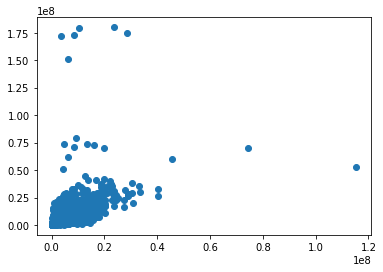

(nan, 1.0)

array([[nan, nan],
       [nan,  1.]])

SpearmanrResult(correlation=nan, pvalue=nan)

Boro-Block-Lot                     object
Address                            object
Neighborhood                       object
Building Classification            object
Total Units                         int64
Year Built                          int64
Gross SqFt                          int64
Estimated Gross Income              int64
Gross Income per SqFt             float64
Estimated Expense                   int64
Expense per SqFt                  float64
Net Operating Income                int64
Full Market Value                   int64
Market Value per SqFt             float64
Boro-Block-Lot 1                   object
Address 1                          object
Neighborhood 1                     object
Building Classification 1          object
Total Units 1                       int64
Year Built 1                        int64
Gross SqFt 1                        int64
Estimated Gross Income 1          float64
Gross Income per SqFt 1           float64
Estimated Expense 1               

Boro-Block-Lot                       0
Address                              0
Neighborhood                         0
Building Classification              0
Total Units                          0
Year Built                           0
Gross SqFt                           0
Estimated Gross Income               0
Gross Income per SqFt                0
Estimated Expense                    0
Expense per SqFt                     0
Net Operating Income                 0
Full Market Value                    0
Market Value per SqFt                0
Boro-Block-Lot 1                     0
Address 1                            0
Neighborhood 1                       0
Building Classification 1            0
Total Units 1                        0
Year Built 1                         0
Gross SqFt 1                         0
Estimated Gross Income 1             1
Gross Income per SqFt 1              0
Estimated Expense 1                  1
Expense per SqFt 1                   0
Net Operating Income 1   

(31348, 61)

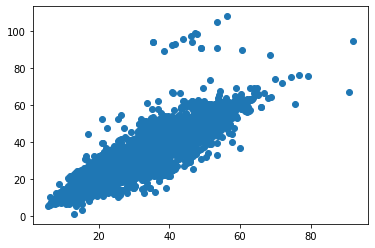

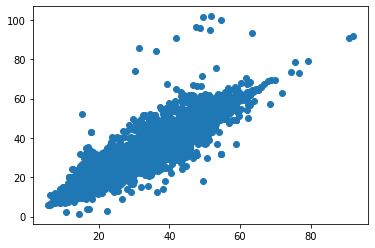

2012

2018

In [38]:
pwd

'/Users/Erika/Downloads'

In [14]:
geospatial = pd.read_csv('Address_Point.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
geospatial.head()

,BIN,H_NO,ADDRESS_ID,the_geom,HNO_SUFFIX,HYPHEN_TYP,SIDE_OF_ST,SPECIAL_CO,BOROCODE,ZIPCODE,...,HN_RNG,HN_RNG_SUF,PHYSICALID,PRE_MODIFI,PRE_DIRECT,PRE_TYPE,POST_TYPE,POST_DIREC,POST_MODIF,FULL_STREE
0,1034253,560,1030290,POINT (-73.97940791208316 40.756085886290094),NaN,N,1,V,1,10036.0,...,NaN,NaN,1851,NaN,NaN,NaN,AVE,NaN,NaN,5 AVE
1,3001479,25,3002257,POINT (-73.99426621088828 40.70193654938605),NaN,N,1,V,3,11201.0,...,NaN,NaN,100296,NaN,NaN,NaN,HTS,NaN,NaN,COLUMBIA HTS
2,4080420,1903,89223,POINT (-73.91888160897726 40.712779452812015),NaN,N,1,V,4,11385.0,...,NaN,NaN,23102,NaN,NaN,NaN,AVE,NaN,NaN,FLUSHING AVE
3,1070766,205,1027498,POINT (-73.98637573862578 40.77857091070502),NaN,N,1,V,1,10023.0,...,NaN,NaN,4140,NaN,W,NaN,AVE,NaN,NaN,W END AVE
4,2114036,3205,5178668,POINT (-73.91269643851712 40.88418333951877),NaN,N,2,V,2,10463.0,...,NaN,NaN,61034,NaN,NaN,NaN,AVE,NaN,NaN,ARLINGTON AVE


In [17]:
geojson = gpd.read_file('NYC Address Points.geojson')

In [18]:
geojson.head().T

,0,1,2,3,4
zipcode,10036,11201,11385,10023,10463
hn_rng,None,None,None,None,None
pre_direct,None,None,None,W,None
hno_suffix,None,None,None,None,None
post_type,AVE,HTS,AVE,AVE,AVE
hyphen_typ,N,N,N,N,N
post_modif,None,None,None,None,None
address_id,1030290,3002257,89223,1027498,5178668
pre_type,None,None,None,None,None
full_stree,5 AVE,COLUMBIA HTS,FLUSHING AVE,W END AVE,ARLINGTON AVE


In [21]:
geojson.hno_suffix.value_counts()

A           12671
B            4173
1/2          1369
C             932
REAR          705
D             541
E             306
F             221
G             156
H             123
R              81
J              79
I              71
S              65
1/3            58
REAR-A         47
K              47
REAR-B         39
L              38
GAR            24
N              20
W              18
1/4            15
1/2-A          12
M              11
FRONT          10
Q               8
T               6
P               6
INTER-A         6
            ...  
1               4
O               3
BB              2
E-BLDG          2
Y               2
W-BLDG          2
1/2-C           2
U               2
43102           1
A5              1
FRTA            1
C GARAGE        1
AA              1
A3              1
2L              1
1/2-B           1
20              1
B3              1
A4              1
1A              1
A1              1
B1              1
3/4             1
B5              1
A2        

In [ ]:
geojson["full_stree"] = geojson["h_no"].map(str) + geojson["full_stree"].map(str) 

In [ ]:
geojson.head()